Assignment 1: Compare Tests for Goodness of fit (on real data)

Test whether a gaussian model N($\mu$, $\sigma$) for the age distribution of citibike drivers is a sensible model, or if you can find a better fit with another distribution.

Use 2 tests: KS, AD, KL, chisq (even though we have not talked about it in detail yet) to do this.

Test at the Normal and a least one other distributions (e.g. Poisson, or Binomial, or Chisq, Lognormal.......)

No skeleton: you are on your own!

Extra credit: Divide your sample geographically: by Borrow + split Manhattan in an Uptown and a Downtown sample (use your discretion to do so, but ZIP code is a good idea) and see if you notice any differences in how the age distribution can be modeled.

In [4]:
import pylab as pl
import pandas as pd
import numpy as np
from getCitiBikeCSV import getCitiBikeCSV 
import json

import scipy.stats
import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
datestring = '201501'
getCitiBikeCSV(datestring)
df = pd.read_csv(os.getenv('PUIDATA')+'/' + datestring + '-citibike-tripdata.csv')

('Downloading', '201501')
file in place, you can continue


In [6]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1


In [20]:
dfage = df['birth year'][(df['usertype'] == 'Subscriber')]
dfage = 2016 - dfage

In [22]:
dfage.dropna(inplace = True)

In [24]:
dfage.head()

0    56.0
1    53.0
2    42.0
3    47.0
4    39.0
Name: birth year, dtype: float64

In [25]:
dfage = pd.DataFrame(dfage)

In [27]:
dfage.columns = ['Age']

In [28]:
dfage.head()

,Age
0,56.0
1,53.0
2,42.0
3,47.0
4,39.0


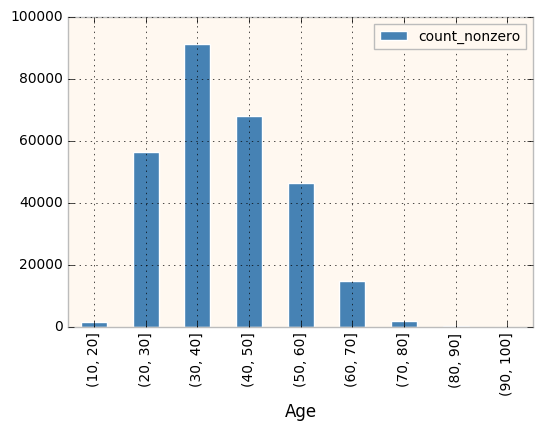

In [31]:
bins = np.arange(10, 110, 10)
age = dfage.Age.groupby(pd.cut(dfage.Age, bins)).agg([count_nonzero]).plot(kind='bar' )

#### Figure 1 Distribution of the citibike riders by age in Janurary 2015.

### Test at the Normal Distribution with KS test

In [34]:
len(dfage)

279924

In [35]:
ksdfage = scipy.stats.kstest(dfage[::500], 'norm', args=(dfage.mean(), dfage.std()))

In [36]:
ksdfage

KstestResult(statistic=0.99929463683659037, pvalue=0.0)

#### pvalue <= 0.001. So we can reject the null hypothesis that the age distribution of citibike drivers does not come from a gaussian model

### Test at the Normal Distribution with AD test

In [37]:
addfage = scipy.stats.anderson(dfage[::500].values.flatten(), dist = 'norm')
addfage

AndersonResult(statistic=7.3601613532289321, critical_values=array([ 0.572,  0.651,  0.781,  0.912,  1.084]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

#### The significance_level is larger than critical_value. We can reject the null hypothesis that the age distribution of citibike drivers does not come from a gaussian model.

### Test at the Poisson Distribution with KS test

In [38]:
ksdfageP = scipy.stats.kstest(dfage[::500], 'poisson', args=(dfage.mean(), dfage.std()))

In [39]:
ksdfageP

KstestResult(statistic=0.99999999963281916, pvalue=0.0)

#### pvalue <= 0.001. So we can reject the null hypothesis that the age distribution of citibike drivers does not come from a gaussian model

### Test at the Exponential Distribution with AD test

In [41]:
addfageP = scipy.stats.anderson(dfage[::500].values.flatten(), dist = 'expon')
addfageP

AndersonResult(statistic=134.45919969467275, critical_values=array([ 0.921,  1.077,  1.34 ,  1.604,  1.955]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

#### The significance_level is larger than critical_value. We can reject the null hypothesis that the age distribution of citibike drivers does not come from a gaussian model.